<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo_18/blob/main/Equipo_18_Entrega_1_Aguas_Subterraneas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

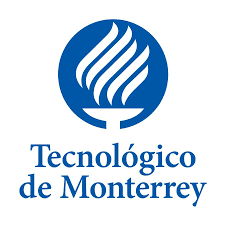

# **TC4029 Ciencia y analítica de datos**

Reto: Entrega 1

Limpieza, análisis, visualización y agrupamiento.

# **Aguas subterraneas**

José Eduardo Esperón Carreón A01372413

Moisés Rangel Silva A00143704

Profesora: Dra. María de la Paz Rico Fernández

Noviembre 11 de 2022

# Sección nueva

# Sección nueva

**Indice de la Entrega 1**

*   Limpieza de base de datos.

> Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
*   Identificando tendencias centrales promedio, media y mediana de los datos.
*   Identificar medidas de dispersión, máximo, mínimo
*   Identificar medidas de posición no centrales , los cuartiles , outliers
*   Identificar correlaciones.
*   Preparar los datos


*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.



In [221]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import graphviz
import math
import pydotplus
import missingno as msno
import seaborn as sns  
import seaborn as load_dataset
import os
import warnings

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from scipy.stats import boxcox
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

from tqdm import tqdm
%matplotlib inline
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 456 kB/s 
     |████████████████████████████████| 1.0 MB 45.3 MB/s 
     |████████████████████████████████| 1.7 MB 40.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 52.4 MB/s 
     |████████████████████████████████| 6.3 MB 41.5 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=1e92edcadf2b28f08c3a6815ad3b7549828f4dfe7cd70399e2febbada6ae407a
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=79e44162d2a0ad988cf23ee855b561ef5da4a87c0081a92f8d7ef2c5358519ed
  Stored in directory: /root/.

In [168]:
#Creación del data frame de las aguas subterraneas

Data = "/content/sample_data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
AGUASUB = pd.read_csv(Data, encoding = "ISO-8859-1")
AGUASUB


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [169]:
AGUASUB.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [170]:
AGUASUB.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [171]:
AGUASUB.shape

(1068, 57)

# Limpieza de base de datos.

In [172]:
AGUASUB.isnull().values.any()  #Si existen valores nulos

True

In [173]:
AGUASUB.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [174]:
#Mostrar los datos faltantes:

AGUASUB[AGUASUB.isnull()]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# Reemplazando datos categóricos donde deben ser numéricos
rAGUASUB = AGUASUB.copy()
rAGUASUB["SDT_M_mg/L"]= rAGUASUB["SDT_M_mg/L"].replace(["<25"], 24.999)

rAGUASUB["FLUORUROS_mg/L"]= rAGUASUB["FLUORUROS_mg/L"].replace(["<0.2"], 0.199)

rAGUASUB["DUR_mg/L"]= rAGUASUB["DUR_mg/L"].replace(["<20"], 19.999)

rAGUASUB["COLI_FEC_NMP/100_mL"]= rAGUASUB["COLI_FEC_NMP/100_mL"].replace(["<1.1"], 1.099)

rAGUASUB["N_NO3_mg/L"]= rAGUASUB["N_NO3_mg/L"].replace(["<0.02"], 0.0199)

rAGUASUB["AS_TOT_mg/L"]= rAGUASUB["AS_TOT_mg/L"].replace(["<0.01"], 0.0099)

rAGUASUB["CD_TOT_mg/L"]= rAGUASUB["CD_TOT_mg/L"].replace(["<0.003"], 0.00299)

rAGUASUB["CR_TOT_mg/L"]= rAGUASUB["CR_TOT_mg/L"].replace(["<0.005"], 0.00499)

rAGUASUB["HG_TOT_mg/L"]= rAGUASUB["HG_TOT_mg/L"].replace(["<0.0005"], 0.000499)

rAGUASUB["PB_TOT_mg/L"]= rAGUASUB["PB_TOT_mg/L"].replace(["<0.005"], 0.00499)

rAGUASUB["MN_TOT_mg/L"]= rAGUASUB["MN_TOT_mg/L"].replace(["<0.0015"], 0.001499)

rAGUASUB["FE_TOT_mg/L"]= rAGUASUB["FE_TOT_mg/L"].replace(["<0.025"], 0.02499)

# Reemplazando ND por NO en binarias
rAGUASUB["CUMPLE_CON_ALC"]= rAGUASUB["CUMPLE_CON_ALC"].replace(["ND"], ["NO"])

rAGUASUB["CUMPLE_CON_COND"]= rAGUASUB["CUMPLE_CON_COND"].replace(["ND"], ["NO"])

rAGUASUB["CUMPLE_CON_SDT_ra"]= rAGUASUB["CUMPLE_CON_SDT_ra"].replace(["ND"], ["NO"])

rAGUASUB["CUMPLE_CON_SDT_salin"]= rAGUASUB["CUMPLE_CON_SDT_salin"].replace(["ND"], ["NO"])

rAGUASUB["CUMPLE_CON_DUR"]= rAGUASUB["CUMPLE_CON_DUR"].replace(["ND"], ["NO"])

rAGUASUB["CUMPLE_CON_NO3"]= rAGUASUB["CUMPLE_CON_NO3"].replace(["ND"], ["NO"])

Se reemplaza ND (no definbido) por No, debido la importancia de que NO haya contaminantes en el agua.

Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable

In [176]:
#Columnas categóricas
df_name_cate = ['CLAVE','SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','SEMAFORO','CONTAMINANTES']
#Columnas ordinales o discretas cuantitativas
df_name_ord = ['PERIODO']
#Columnas numéricas o cuantitativas
df_name_num = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
#Columnas binarias
df_name_bin = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']


In [177]:
#Revisión de los posibles valores de cada propiedad categóricas
for n in df_name_cate:
  print(n + ": ", rAGUASUB[n].unique())

CLAVE:  ['DLAGU6' 'DLAGU6516' 'DLAGU7' ... 'OCRBR5105M2' 'OCRBR5106M1'
 'OCRBR5109M1']
SITIO:  ['POZO SAN GIL' 'POZO R013 CAÑADA HONDA' 'POZO COSIO' ...
 'HACIENDA MEXIQUITO POZO 01' 'COMUNIDAD LOS POCITOS'
 'COMUNIDAD LA REFORMA']
ORGANISMO_DE_CUENCA:  ['LERMA SANTIAGO PACIFICO' 'PENINSULA DE BAJA CALIFORNIA'
 'PENINSULA DE YUCATAN' 'RIO BRAVO' 'CUENCAS CENTRALES DEL NORTE'
 'PACIFICO NORTE' 'BALSAS' 'PACIFICO SUR' 'GOLFO NORTE'
 'AGUAS DEL VALLE DE MEXICO' 'GOLFO CENTRO' 'FRONTERA SUR' 'NOROESTE']
ESTADO:  ['AGUASCALIENTES' 'BAJA CALIFORNIA SUR' 'CAMPECHE' 'CHIHUAHUA'
 'COAHUILA DE ZARAGOZA' 'COLIMA' 'DURANGO' 'MEXICO' 'GUANAJUATO'
 'GUERRERO' 'HIDALGO' 'MICHOACAN DE OCAMPO' 'NAYARIT' 'PUEBLA'
 'QUERETARO ARTEAGA' 'QUINTANA ROO' 'SAN LUIS POTOSI' 'TABASCO' 'TLAXCALA'
 'ZACATECAS' 'DISTRITO FEDERAL' 'MORELOS' 'OAXACA' 'CHIAPAS'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'TAMAULIPAS' 'JALISCO' 'SONORA'
 'BAJA CALIFORNIA' 'SINALOA' 'YUCATAN' 'NUEVO LEON']
MUNICIPIO:  ['ASIENTOS' 'AGUASCALIENTES

In [178]:
#Revisión de los posibles valores de cada propiedad ordinal
for n in df_name_ord:
  print(n + ": ", rAGUASUB[n].unique())

PERIODO:  [2020]


In [179]:
#Revisión de los posibles valores de cada propiedad binarias
for n in df_name_bin:
  print(n + ": ", rAGUASUB[n].unique())

CUMPLE_CON_ALC:  ['SI' 'NO']
CUMPLE_CON_COND:  ['SI' 'NO']
CUMPLE_CON_SDT_ra:  ['SI' 'NO']
CUMPLE_CON_SDT_salin:  ['SI' 'NO']
CUMPLE_CON_FLUO:  ['SI' 'NO']
CUMPLE_CON_DUR:  ['SI' 'NO']
CUMPLE_CON_CF:  ['SI' 'NO']
CUMPLE_CON_NO3:  ['SI' 'NO']
CUMPLE_CON_AS:  ['SI' 'NO']
CUMPLE_CON_CD:  ['SI' 'NO']
CUMPLE_CON_CR:  ['SI' 'NO']
CUMPLE_CON_HG:  ['SI' 'NO']
CUMPLE_CON_PB:  ['SI' 'NO']
CUMPLE_CON_MN:  ['SI' 'NO']
CUMPLE_CON_FE:  ['SI' 'NO']


In [180]:
#Revisión de nulos en el DataFrame
rAGUASUB.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [181]:
#Revisión de faltantes en el DataFrame
rAGUASUB.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [182]:
nAGUASUB = rAGUASUB.copy()
nAGUASUB.dropna(thresh = 1, axis = 1, inplace = True) 
nAGUASUB

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [183]:
#Revisión de nulos en el DataFrame
nAGUASUB.isnull().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
ALC_mg/L                  4
CALIDAD_ALC               4
CONDUCT_mS/cm             6
CALIDAD_CONDUC            6
SDT_M_mg/L                2
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  1
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                1
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L         

In [184]:
#Columnas categóricas
df_name_cate = ['CLAVE','SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','SEMAFORO','CONTAMINANTES']
#Columnas ordinales o discretas cuantitativas
df_name_ord = ['PERIODO']
#Columnas numéricas o cuantitativas
df_name_num = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
#Columnas binarias
df_name_bin = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']


Imputación de moda a los categóricos

In [185]:
#Transformaciones a factores categóricos de entrada
catOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder())])

In [186]:
#Transformaciones a factores categóricos de entrada
nAGUASUB_cat = nAGUASUB[df_name_cate].copy()
columnasTransformerCat = ColumnTransformer(transformers = [('catohe', catOHE_pipeline, df_name_cate)])
nAGUASUBFitCat = columnasTransformerCat.fit(nAGUASUB_cat)
nAGUASUBTransfCat = nAGUASUBFitCat.transform(nAGUASUB_cat)

In [187]:
#Pasando la matriz que se arroja como resultado de la normalización a un DataFrame
df_cat = pd.DataFrame(nAGUASUBTransfCat.toarray())
df_cat

,0,1,2,3,4,5,6,7,8,9,...,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
df_cat.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
3086    0
3087    0
3088    0
3089    0
3090    0
Length: 3091, dtype: int64

In [189]:
#Transformaciones a factores ordinales de entrada
catOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder())])

In [190]:
#Transformaciones a factores ordinales de entrada
nAGUASUB_ord = nAGUASUB[df_name_ord].copy()
columnasTransformerOrd = ColumnTransformer(transformers = [('catohe', catOHE_pipeline, df_name_ord)])
nAGUASUBFitOrd = columnasTransformerOrd.fit(nAGUASUB_ord)
nAGUASUBTransfOrd = nAGUASUBFitOrd.transform(nAGUASUB_ord)

In [191]:
#Pasando el array que se arroja como resultado de la normalización a un DataFrame
df_ord = pd.DataFrame(nAGUASUBTransfOrd)
df_ord

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1063,1.0
1064,1.0
1065,1.0
1066,1.0


In [192]:
df_ord.isnull().sum()

0    0
dtype: int64

In [193]:
#Transformaciones a factores binarios de entrada
nAGUASUB_bin = nAGUASUB[df_name_bin].copy()
columnasTransformerBin = ColumnTransformer(transformers = [('catohe', catOHE_pipeline, df_name_bin)])
nAGUASUBFitBin = columnasTransformerBin.fit(nAGUASUB_bin)
nAGUASUBTransfBin = nAGUASUBFitBin.transform(nAGUASUB_bin)
nAGUASUBTransfBin

array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [194]:
#Pasando el array que se arroja como resultado de la normalización a un DaatFrame
df_bin = pd.DataFrame(nAGUASUBTransfBin)
df_bin

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1064,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1065,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1066,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [195]:
df_bin.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

Imputación de media a numéricos

In [196]:
#Transformación y normalización de los datos númericos
num_pipeline = Pipeline(steps = [('impPromedio', SimpleImputer(strategy='mean')),
                                 ('log', FunctionTransformer(np.log)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))])

nAGUASUB_num = nAGUASUB[df_name_num].copy()

columnasTransformerNum = ColumnTransformer(transformers = [('numerical', num_pipeline, df_name_num)])
nAGUASUBFit = columnasTransformerNum.fit(nAGUASUB_num)
nAGUASUBTransf = nAGUASUBFit.transform(nAGUASUB_num)
nAGUASUBTransf

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_function_transformer.py:205: RuntimeWarning: invalid value encountered in log
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_function_transformer.py:205: RuntimeWarning: invalid value encountered in log
  return func(X, **(kw_args if kw_args else {}))


array([[       nan, 0.52222665, 0.52243359, ..., 0.        , 0.        ,
        0.1432511 ],
       [       nan, 0.51051321, 0.52453204, ..., 0.        , 0.        ,
        0.        ],
       [       nan, 0.53099551, 0.49446149, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [       nan, 0.69569735, 0.61044505, ..., 0.        , 0.31978581,
        0.24140446],
       [       nan, 0.65880282, 0.4801128 , ..., 0.        , 0.23914296,
        0.22160913],
       [       nan, 0.67331358, 0.55500279, ..., 0.        , 0.        ,
        0.        ]])

In [197]:
# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [
                                                        ('numpipe', num_pipeline, df_name_num),
                                                        ('catohecat', catOHE_pipeline, df_name_cate),
                                                        ('catohecat', catOHE_pipeline, df_name_ord),
                                                        ('catohebin', catOHE_pipeline, df_name_bin),
                                                    ])

In [198]:
nAGUASUB_num

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.732,1.099,4.184656,0.0161,0.00299,0.00499,0.000499,0.00499,0.001499,0.0891
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,1.099,5.75011,0.0134,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
2,-102.28801,22.36685,204.920,532.0,342,1.8045,120.719,1.099,1.449803,0.037,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.879,1.099,1.258597,0.0154,0.00299,0.005,0.000499,0.00499,0.001499,0.02499
4,-110.24480,23.45138,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,0.0099,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,2350.0,1545.8,0.199,752.096,1.099,14.615488,0.0099,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
1064,-99.70099,24.78280,256.000,529.0,297,0.199,273,1.099,77.392,0.0099,0.00299,0.00499,0.000499,0.00499,0.00709,0.07578
1065,-99.82249,25.55197,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,0.0099,0.00299,0.00499,0.000499,0.00499,0.0242,0.2129
1066,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.368,1.099,0.0199,0.0099,0.00299,0.00499,0.000499,0.00499,0.012,0.1786


In [200]:
nAGUASUB

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


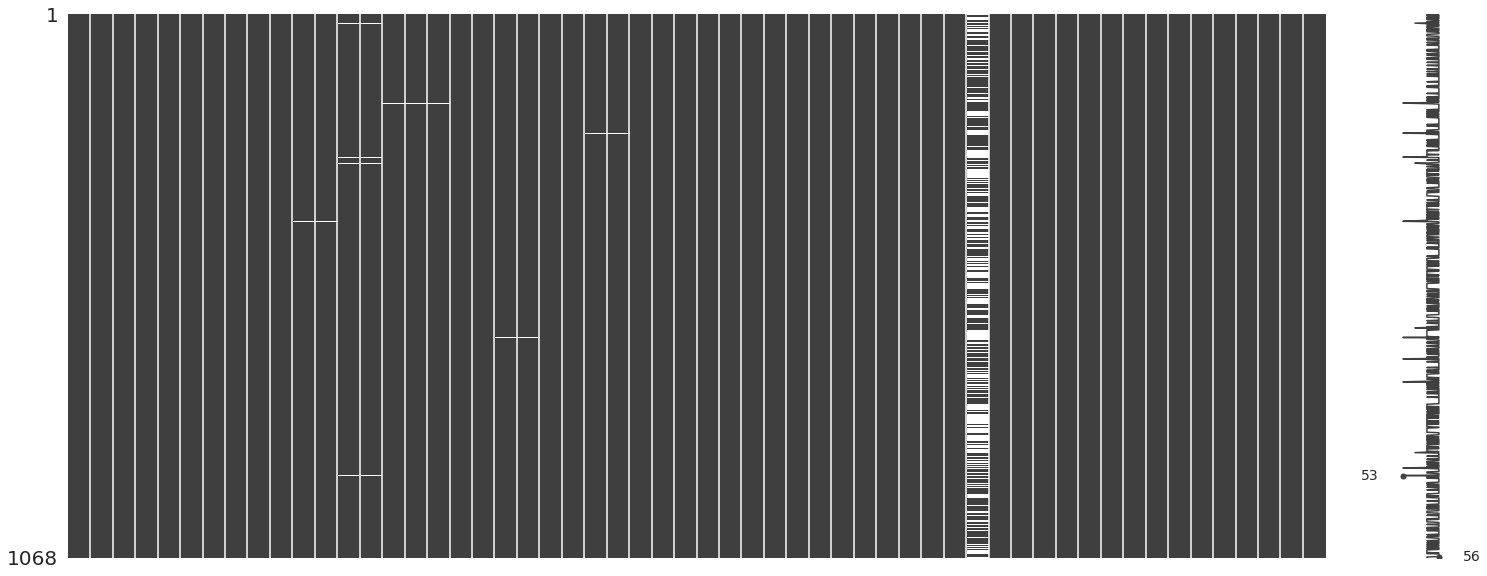

In [210]:
#Revisión de datos faltantes
msno.matrix(nAGUASUB)

# Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

Identificando tendencias centrales promedio, media y mediana de los datos. 

Identificar medidas de dispersión, máximo, mínimo .

Identificar medidas de posición no centrales , los cuartiles , outliers.   

Identificar correlaciones.

Preparar los datos 

In [211]:
nAGUASUB_num.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1068.000000,1068.000000,1064.000000,1062.000000
mean,-101.891007,23.163618,235.633759,1138.953013
std,6.703263,3.887670,116.874291,1245.563674
min,-116.664250,14.561150,26.640000,50.400000
25%,-105.388865,20.212055,164.000000,501.750000
50%,-102.174180,22.617190,215.527500,815.000000
75%,-98.974716,25.510285,292.710000,1322.750000
max,-86.864120,32.677713,1650.000000,18577.000000


In [212]:
nAGUASUB_num.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD         -101.891007
LATITUD            23.163618
ALC_mg/L          235.633759
CONDUCT_mS/cm    1138.953013
dtype: float64

In [213]:
#Pasando el array que se arroja como resultado de la transformación y normalización a un DaatFrame
df_histo = pd.DataFrame(nAGUASUB_num, columns = ['LONGITUD','LATITUD',"ALC_mg/L","CONDUCT_mS/cm"])
df_histo

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
0,-102.02210,22.20887,229.990,940.0
1,-102.20075,21.99958,231.990,608.0
2,-102.28801,22.36685,204.920,532.0
3,-102.29449,22.18435,327.000,686.0
4,-110.24480,23.45138,309.885,1841.0
...,...,...,...,...
1063,-99.54191,24.76036,231.045,2350.0
1064,-99.70099,24.78280,256.000,529.0
1065,-99.82249,25.55197,330.690,2600.0
1066,-100.32683,24.80118,193.140,873.0


In [214]:
#Función que grafica un histograma de acuerdo a los parámetros predefinidos
def plot_hist(df_histo):
  #Tamaño de la figura
  sns.set(rc={'figure.figsize':(10,4)})
  len_col = len(df_histo.columns)
  # ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.
  fig, axes = plt.subplots(1, len_col)
  for k in range(0,len_col):
    plt.subplot(1, len_col, k+1)
    # X_train_data.columns devuelve una lista con los nombres de las columnas.
    plt.hist(df_histo[df_histo.columns[k]], bins=20)
    plt.xlabel(df_histo.columns[k])
  plt.show()

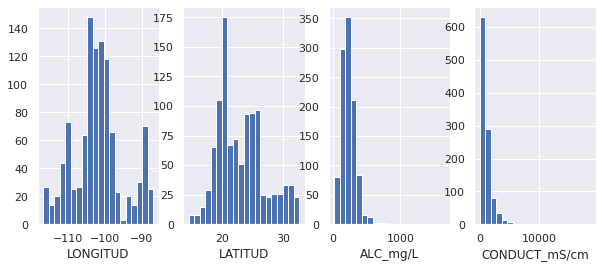

In [215]:
#Impresión de la grafica de los datos del DataFrame númerico
plot_hist(df_histo)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


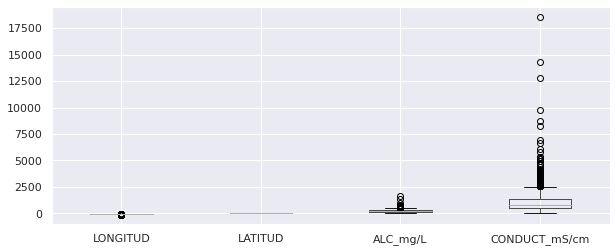

In [217]:
#Diagrama de caja de los resultados de los diferentes modelos
boxplot = df_histo.boxplot(column=['LONGITUD','LATITUD',"ALC_mg/L","CONDUCT_mS/cm"])  

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

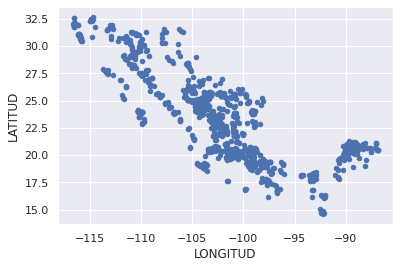

In [228]:
latlong = nAGUASUB_num[["LONGITUD","LATITUD"]]
latlong
latlong.plot.scatter("LONGITUD","LATITUD")

In [229]:
latlong.describe()

,LONGITUD,LATITUD
count,1068.000000,1068.000000
mean,-101.891007,23.163618
std,6.703263,3.887670
min,-116.664250,14.561150
25%,-105.388865,20.212055
50%,-102.174180,22.617190
75%,-98.974716,25.510285
max,-86.864120,32.677713


In [257]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [263]:
nAGUASUB_num["Coordinates"] = list(zip(nAGUASUB_num.LONGITUD, nAGUASUB_num.LATITUD))
nAGUASUB_num["Coordinates"] = nAGUASUB_num["Coordinates"].apply(Point)
nAGUASUB_num.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,Coordinates
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.732,1.099,4.184656,0.0161,0.00299,0.00499,0.000499,0.00499,0.001499,0.0891,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,1.099,5.75011,0.0134,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,204.920,532.0,342,1.8045,120.719,1.099,1.449803,0.037,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.879,1.099,1.258597,0.0154,0.00299,0.005,0.000499,0.00499,0.001499,0.02499,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,0.0099,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499,POINT (-110.2448 23.45138)


In [266]:
gdf = gpd.GeoDataFrame(nAGUASUB_num, geometry="Coordinates")
gdf.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,Coordinates
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.732,1.099,4.184656,0.0161,0.00299,0.00499,0.000499,0.00499,0.001499,0.0891,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,1.099,5.75011,0.0134,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,204.920,532.0,342,1.8045,120.719,1.099,1.449803,0.037,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.879,1.099,1.258597,0.0154,0.00299,0.005,0.000499,0.00499,0.001499,0.02499,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,0.0099,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499,POINT (-110.24480 23.45138)


In [267]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [268]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

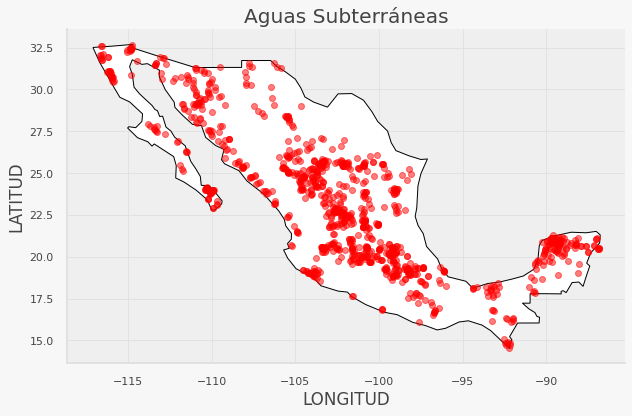

In [270]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# localidades
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas Subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()